In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from numpy.linalg import det, inv
from math import sqrt, pi
import scipy.io
import matplotlib.pyplot as plt
import pickle
import sys

In [2]:
def ldaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmat - A single d x d learnt covariance matrix 
    
    # IMPLEMENT THIS METHOD 
    cat = np.unique(y)
    means = np.zeros([cat.shape[0],X.shape[1]])

    for i in range(cat.shape[0]):
        mean = np.mean(X[np.where(y == cat[i])[0],],axis=0)
        means[i,] = mean
    
    covmat = np.cov(np.transpose(X))
    return means,covmat

In [3]:
def qdaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmats - A list of k d x d learnt covariance matrices for each of the k classes
    
    
    # IMPLEMENT THIS METHOD
    
    covmats = []
    cat = np.unique(y)
    means = np.zeros([cat.shape[0],X.shape[1]])

    for i in range(cat.shape[0]):
        mean = np.mean(X[np.where(y == cat[i])[0],],axis=0)
        means[i,] = mean
        covmats.append(np.cov(np.transpose(X[np.where(y == cat[i])[0],])))
        
    return means,covmats

In [4]:
def ldaTest(means,covmat,Xtest,ytest):
    # Inputs
    # means, covmat - parameters of the LDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels
    
    #posterior = []
    posterior = np.zeros((Xtest.shape[0],means.shape[0]))
    den = 1/np.sqrt((2*pi)**means.shape[1]*det(covmat))
    for j in range(means.shape[0]):
        posterior[:,j] = den * np.exp(-0.5*np.array([np.dot(np.dot((Xtest[i,:] - means[j,:]),inv(covmat)),np.transpose(Xtest[i,:] - means[j,:])) for i in range(Xtest.shape[0])]))

    ypred = np.argmax(posterior,axis=1) + 1
    posterior = (ypred == ytest.ravel())
    acc = len(np.where(posterior)[0])
    return float(acc)/len(ytest),ypred

In [5]:
def qdaTest(means,covmats,Xtest,ytest):
    # Inputs
    # means, covmats - parameters of the QDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels

    # IMPLEMENT THIS METHOD
    
    posterior = np.zeros((Xtest.shape[0],means.shape[0]))
    for j in range(means.shape[0]):
        den = 1/np.sqrt((2*pi)**means.shape[1]*det(covmats[j]))
        posterior[:,j] = den * np.exp(-0.5*np.array([np.dot(np.dot((Xtest[i,:] - means[j,:]),inv(covmats[j])),np.transpose(Xtest[i,:] - means[j,:])) for i in range(Xtest.shape[0])]))
    
    ypred = np.argmax(posterior,axis=1) + 1
    posterior = (ypred == ytest.ravel())
    acc = len(np.where(posterior)[0])
    return float(acc)/len(ytest),ypred

In [6]:
def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                               
    # Output: 
    # w = d x 1 

    w = np.dot(scipy.linalg.inv(np.dot(np.transpose(X),X)),(np.dot(np.transpose(X),y)))
    
    # IMPLEMENT THIS METHOD 
    
    return w

In [7]:
def learnRidgeRegression(X,y,lambd):
    # Inputs:
    # X = N x d                                                               
    # y = N x 1 
    # lambd = ridge parameter (scalar)
    # Output:                                                                  
    # w = d x 1           
    w = np.dot((scipy.linalg.inv(lambd * np.eye(X.shape[1]) + np.dot(np.transpose(X),X))), np.dot(np.transpose(X),y))
    
    

    # IMPLEMENT THIS METHOD                                                   
    return w

In [8]:
def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = X x 1
    # Output:
    # mse
    mse = np.sum(((ytest - np.dot(Xtest,w)) ** 2)) / (Xtest.shape[0])
    
    # IMPLEMENT THIS METHOD
    return mse

In [9]:
def regressionObjVal(w, X, y, lambd):

    # compute squared error (scalar) and gradient of squared error with respect
    # to w (vector) for the given data X and y and the regularization parameter
    # lambda                                                                  

    # Here (y - Xw) can be taken as one variable 
    

    w = np.asmatrix(w)
    w = np.transpose(w)
    ins_term = y - np.dot(X_i,w)
    #print(np.shape(ins_term))
    
    error = 0.5 * (np.dot(np.transpose(ins_term),ins_term)) + lambd * 0.5 * np.dot((np.transpose(w)),w)
    error_grad = lambd*w -(np.dot(X_i.transpose(),ins_term)) 
    error_grad = np.squeeze(np.array(error_grad))
    #print(error_grad)
    
    # IMPLEMENT THIS METHOD                                             
    return error, error_grad

In [10]:
def mapNonLinear(x,p):
    # Inputs:                                                                  
    # x - a single column vector (N x 1)                                       
    # p - integer (>= 0)                                                       
    # Outputs:                                                                 
    # Xp - (N x (p+1)) 
    Xd = np.zeros((x.shape[0], p+1));
    for i in range(p+1):
        Xd[:,i] = (x ** (i));
        
	
    # IMPLEMENT THIS METHOD
    return Xd

In [11]:
# Problem 1
# load the sample data                                                                 
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'),encoding = 'latin1')

LDA Accuracy = 0.97
QDA Accuracy = 0.96
[-5.         -4.74747475 -4.49494949 ... 19.49494949 19.74747475
 20.        ]


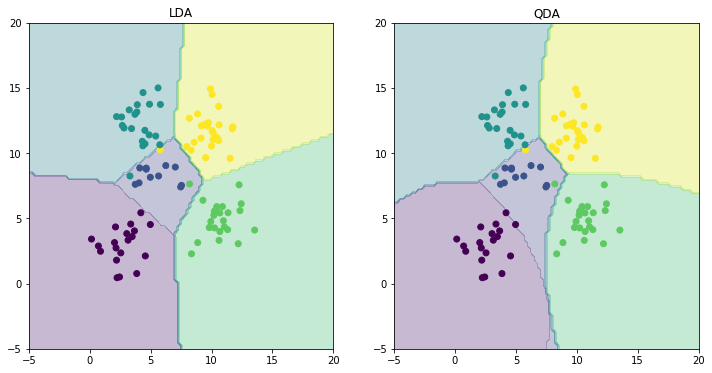

In [12]:
# LDA
means,covmat = ldaLearn(X,y)
ldaacc,ldares = ldaTest(means,covmat,Xtest,ytest)
print('LDA Accuracy = '+str(ldaacc))
# QDA
means,covmats = qdaLearn(X,y)
qdaacc,qdares = qdaTest(means,covmats,Xtest,ytest)
print('QDA Accuracy = '+str(qdaacc))

# plotting boundaries
x1 = np.linspace(-5,20,100)
x2 = np.linspace(-5,20,100)
xx1,xx2 = np.meshgrid(x1,x2)
xx = np.zeros((x1.shape[0]*x2.shape[0],2))
xx[:,0] = xx1.ravel()
print(xx[:,0])
xx[:,1] = xx2.ravel()

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)

zacc,zldares = ldaTest(means,covmat,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zldares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest)
plt.title('LDA')

plt.subplot(1, 2, 2)

zacc,zqdares = qdaTest(means,covmats,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zqdares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest)
plt.title('QDA')

plt.show()

In [13]:
# Problem 2
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding = 'latin1')

# add intercept
X_i = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)


w = learnOLERegression(X,y)
print(Xtest.shape)
print(ytest.shape)
print(w.shape)
print(Xtest.shape[0])

mle = testOLERegression(w,Xtest,ytest)

w_i = learnOLERegression(X_i,y)
mle_i = testOLERegression(w_i,Xtest_i,ytest)

print('MSE without intercept '+str(mle))
print('MSE with intercept '+str(mle_i))

(200, 64)
(200, 1)
(64, 1)
200
MSE without intercept 106775.36152779426
MSE with intercept 3707.8401808270532


2851.3302134438477
Regularisation parameter that gives the Lowest Error for Test Data =  0.06


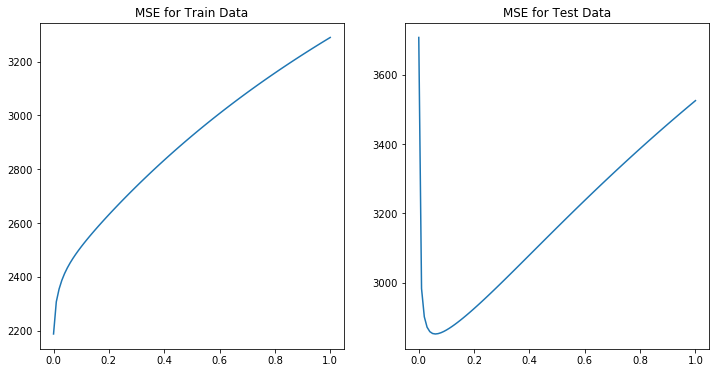

In [14]:
# Problem 3
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
train_lambda = [[],[]]
test_lambda = [[],[]]
mses3_train = np.zeros((k,1))
mses3 = np.zeros((k,1))
for lambd in lambdas:
    w_l = learnRidgeRegression(X_i,y,lambd)
    mses3_train[i] = testOLERegression(w_l,X_i,y)
    mses3[i] = testOLERegression(w_l,Xtest_i,ytest)
    
    train_lambda = [[mses3_train],[lambd]]
    test_lambda = [[mses3],[lambd]]
        
    i = i + 1
    
#print((train_lambda))    
#print((test_lambda)) 
print(np.min(mses3))
print("Regularisation parameter that gives the Lowest Error for Test Data = ",lambdas[np.argmin(mses3)])

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses3_train)
plt.title('MSE for Train Data')
plt.subplot(1, 2, 2)
plt.plot(lambdas,mses3)
plt.title('MSE for Test Data')

plt.show()

2839.5946480818443
Regularisation parameter that gives the Lowest Error for Test Data =  0.02


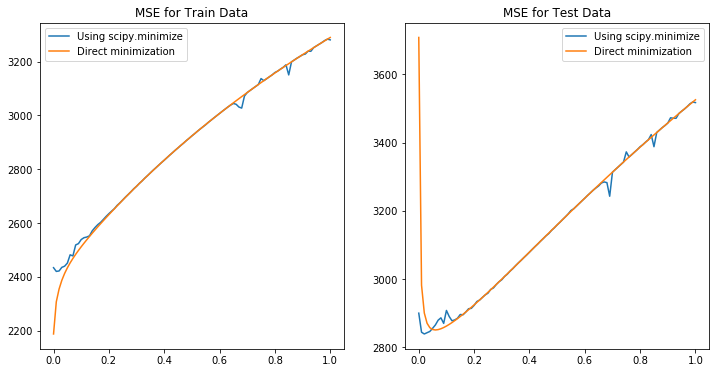

In [15]:
# Problem 4
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses4_train = np.zeros((k,1))
mses4 = np.zeros((k,1))
opts = {'maxiter' : 20}    # Preferred value.                                                
w_init = np.ones((X_i.shape[1],1))
for lambd in lambdas:
    args = (X_i, y, lambd)
    w_l = minimize(regressionObjVal, w_init, jac=True, args=args,method='CG', options=opts)
    w_l = np.transpose(np.array(w_l.x))
    w_l = np.reshape(w_l,[len(w_l),1])
    mses4_train[i] = testOLERegression(w_l,X_i,y)
    mses4[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1

print(np.min(mses4))
print("Regularisation parameter that gives the Lowest Error for Test Data = ",lambdas[np.argmin(mses4)])


fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses4_train)
plt.plot(lambdas,mses3_train)
plt.title('MSE for Train Data')
plt.legend(['Using scipy.minimize','Direct minimization'])

plt.subplot(1, 2, 2)
plt.plot(lambdas,mses4)
plt.plot(lambdas,mses3)
plt.title('MSE for Test Data')
plt.legend(['Using scipy.minimize','Direct minimization'])
plt.show()


Test Error without Regularization =  6286.404791680896
Test Error with Regularization =  3845.0347301734146


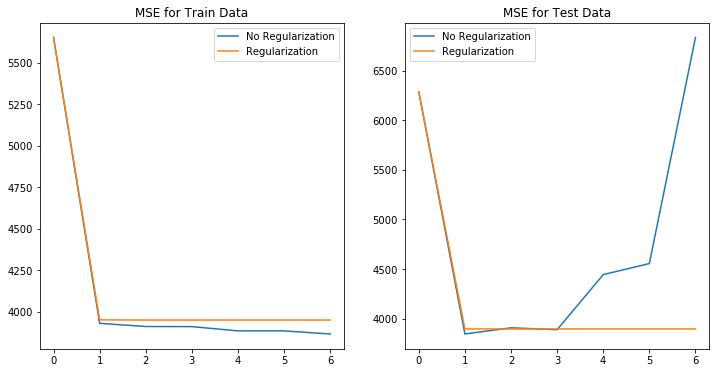

In [16]:
# Problem 5
pmax = 7
lambda_opt = lambdas[np.argmin(mses3)] # REPLACE THIS WITH lambda_opt estimated from Problem 3
mses5_train = np.zeros((pmax,2))
mses5 = np.zeros((pmax,2))
for p in range(pmax):
    Xd = mapNonLinear(X[:,2],p)
    Xdtest = mapNonLinear(Xtest[:,2],p)
    w_d1 = learnRidgeRegression(Xd,y,0)
    mses5_train[p,0] = testOLERegression(w_d1,Xd,y)
    mses5[p,0] = testOLERegression(w_d1,Xdtest,ytest)
    w_d2 = learnRidgeRegression(Xd,y,lambda_opt)
    mses5_train[p,1] = testOLERegression(w_d2,Xd,y)
    mses5[p,1] = testOLERegression(w_d2,Xdtest,ytest)

print("Test Error without Regularization = ",np.min(mses5[0]))
print("Test Error with Regularization = ",np.min(mses5[1]))


fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(range(pmax),mses5_train)
plt.title('MSE for Train Data')
plt.legend(('No Regularization','Regularization'))
plt.subplot(1, 2, 2)
plt.plot(range(pmax),mses5)
plt.title('MSE for Test Data')
plt.legend(('No Regularization','Regularization'))
plt.show()

